# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Data Reading

In [2]:
df = pd.read_csv('walmart.csv')
df.head()

,Store,Dept,Date,IsHoliday,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size
0,1,1,2010-02-05,False,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,2010-02-12,True,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,2010-02-19,False,1611968.17,0,39.93,2.514,211.289143,8.106,NaN,NaN,NaN,NaN,NaN,A,151315
3,1,1,2010-02-26,False,1409727.59,0,46.63,2.561,211.319643,8.106,NaN,NaN,NaN,NaN,NaN,A,151315
4,1,1,2010-03-05,False,1554806.68,0,46.50,2.625,211.350143,8.106,NaN,NaN,NaN,NaN,NaN,A,151315


# Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  bool   
 4   Weekly_Sales  421570 non-null  float64
 5   Holiday_Flag  421570 non-null  int64  
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   CPI           421570 non-null  float64
 9   Unemployment  421570 non-null  float64
 10  MarkDown1     150681 non-null  float64
 11  MarkDown2     111248 non-null  float64
 12  MarkDown3     137091 non-null  float64
 13  MarkDown4     134967 non-null  float64
 14  MarkDown5     151432 non-null  float64
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(4), object(2)
mem

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
Type                 0
Size                 0
dtype: int64

In [6]:
df.describe()

,Store,Dept,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size
count,421570.000000,421570.000000,4.215700e+05,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000
mean,22.200546,44.260317,1.095707e+06,0.070358,60.090059,3.361027,171.201947,7.960289,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136727.915739
std,12.785297,30.492054,5.613908e+05,0.255750,18.447931,0.458515,39.159276,1.863296,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,60980.583328
min,1.000000,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.270000,-265.760000,-29.100000,0.220000,135.160000,34875.000000
25%,11.000000,18.000000,6.066715e+05,0.000000,46.680000,2.933000,132.022667,6.891000,2240.270000,41.600000,5.080000,504.220000,1878.440000,93638.000000
50%,22.000000,37.000000,1.010326e+06,0.000000,62.090000,3.452000,182.318780,7.866000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,140167.000000
75%,33.000000,74.000000,1.463502e+06,0.000000,74.280000,3.738000,212.416993,8.572000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,202505.000000
max,45.000000,99.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,219622.000000


In [7]:
df.describe(include='object')

,Date,Type
count,421570,421570
unique,143,3
top,2011-12-23,A
freq,3027,215478


# Some Data Cleaning

In [8]:
# Renaming columns for easy using
df.columns = df.columns.str.lower()
df.head()

,store,dept,date,isholiday,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,markdown1,markdown2,markdown3,markdown4,markdown5,type,size
0,1,1,2010-02-05,False,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,2010-02-12,True,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,2010-02-19,False,1611968.17,0,39.93,2.514,211.289143,8.106,NaN,NaN,NaN,NaN,NaN,A,151315
3,1,1,2010-02-26,False,1409727.59,0,46.63,2.561,211.319643,8.106,NaN,NaN,NaN,NaN,NaN,A,151315
4,1,1,2010-03-05,False,1554806.68,0,46.50,2.625,211.350143,8.106,NaN,NaN,NaN,NaN,NaN,A,151315


# Handling Missing Values


* **If col has missing < 5 % : Drop Rows with missing values**
* **If col has missing > 40 % : Drop the column**
* **If col has missing (5-40 %): Filling**

In [9]:
# Check Missing again
df.isna().mean().round(3)

store           0.000
dept            0.000
date            0.000
isholiday       0.000
weekly_sales    0.000
holiday_flag    0.000
temperature     0.000
fuel_price      0.000
cpi             0.000
unemployment    0.000
markdown1       0.643
markdown2       0.736
markdown3       0.675
markdown4       0.680
markdown5       0.641
type            0.000
size            0.000
dtype: float64

In [10]:
# To see only the columns with missing values
df.isna().mean() [df.isna().mean() > 0]

markdown1    0.642572
markdown2    0.736110
markdown3    0.674808
markdown4    0.679847
markdown5    0.640790
dtype: float64

In [11]:
missing_percent = df.isnull().mean() * 100

In [12]:
# 1. Drop columns with > 40% missing values
cols_to_drop = missing_percent[missing_percent > 40].index
df.drop(columns=cols_to_drop, inplace=True)

In [13]:
# 2. Drop rows with missing values in columns with < 5% missing
cols_to_dropna = missing_percent[(missing_percent > 0) & (missing_percent < 5)].index
df.dropna(subset=cols_to_dropna, inplace=True)

In [14]:
# 3. Fill missing values in columns with 5–40% missing
cols_to_fill = missing_percent[(missing_percent >= 5) & (missing_percent <= 40)].index
for col in cols_to_fill:
    if df[col].dtype == 'object':
        df[col].fillna('Unknown', inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True) 

In [15]:
df.isna().sum()

store           0
dept            0
date            0
isholiday       0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
type            0
size            0
dtype: int64

In [16]:
df.head()

,store,dept,date,isholiday,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,type,size
0,1,1,2010-02-05,False,1643690.90,0,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,True,1641957.44,1,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,False,1611968.17,0,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,False,1409727.59,0,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,False,1554806.68,0,46.50,2.625,211.350143,8.106,A,151315


# Feature engineering

In [17]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [18]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [19]:
df.set_index('date', inplace=True)

In [20]:
df.head()

,store,dept,isholiday,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,type,size,day,month,year
date,,,,,,,,,,,,,,
2010-02-05,1,1,False,1643690.90,0,42.31,2.572,211.096358,8.106,A,151315,5,2,2010
2010-02-12,1,1,True,1641957.44,1,38.51,2.548,211.242170,8.106,A,151315,12,2,2010
2010-02-19,1,1,False,1611968.17,0,39.93,2.514,211.289143,8.106,A,151315,19,2,2010
2010-02-26,1,1,False,1409727.59,0,46.63,2.561,211.319643,8.106,A,151315,26,2,2010
2010-03-05,1,1,False,1554806.68,0,46.50,2.625,211.350143,8.106,A,151315,5,3,2010


# Analysis

In [21]:
month_sales = df.groupby('month')['weekly_sales'].sum().sort_index()

C:\Users\PC\AppData\Local\Temp\ipykernel_3192\989345420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_sales.index, y=month_sales.values, palette='viridis')


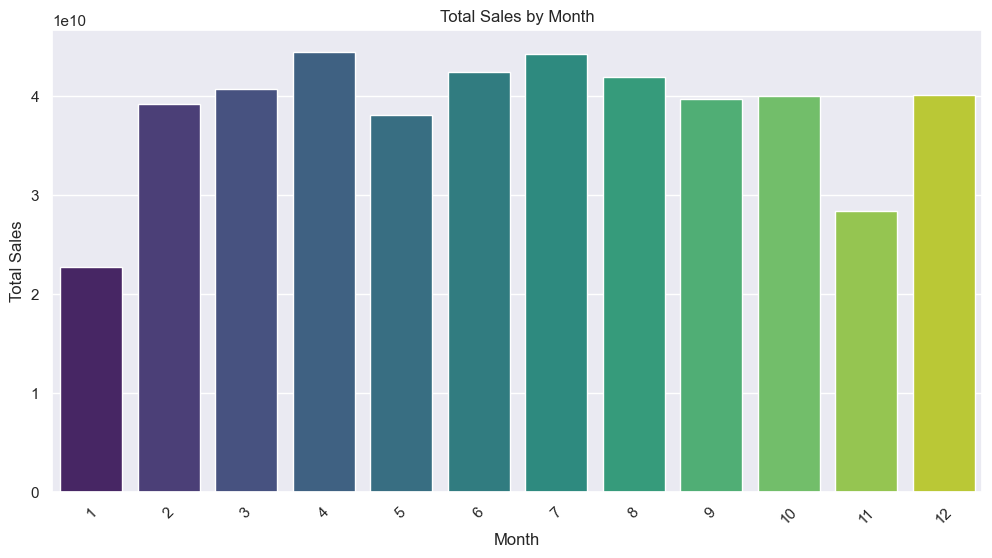

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=month_sales.index, y=month_sales.values, palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [23]:
monthly_trend = df.groupby(['year','month'])['weekly_sales'].sum().reset_index()


In [24]:
monthly_trend['date'] = pd.to_datetime(
    monthly_trend[['year', 'month']].assign(day=1))

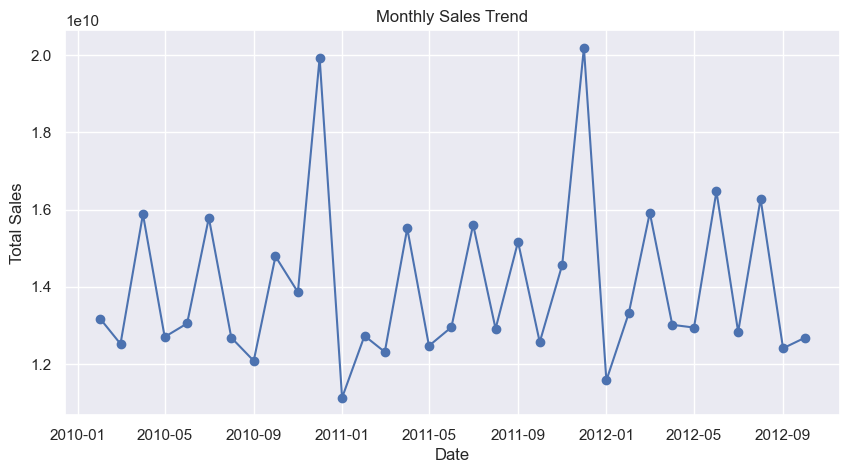

In [25]:
plt.figure(figsize=(10,5))
plt.plot(monthly_trend['date'], monthly_trend['weekly_sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

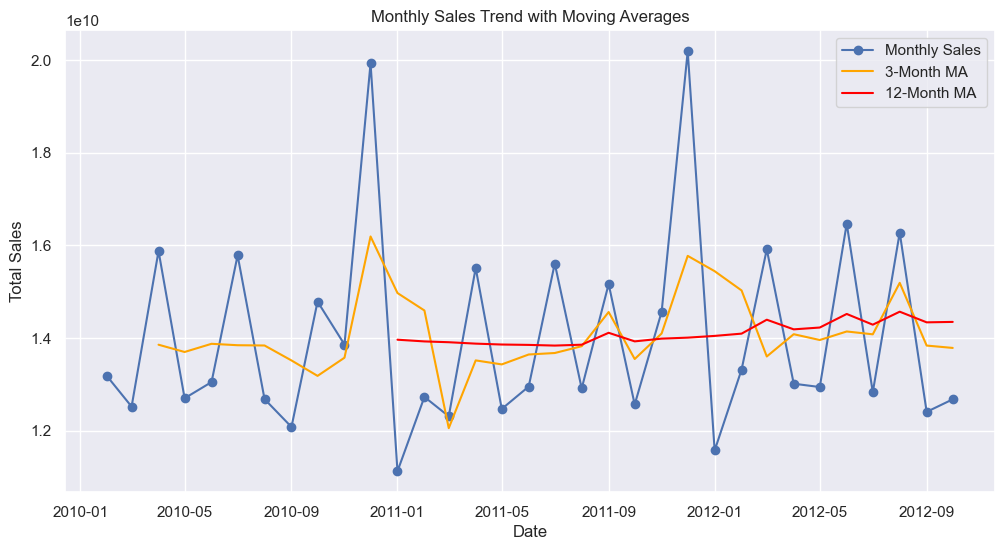

In [26]:
# 3-month and 12-month moving averages
monthly_trend['MA_3'] = monthly_trend['weekly_sales'].rolling(window=3).mean()
monthly_trend['MA_12'] = monthly_trend['weekly_sales'].rolling(window=12).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_trend['date'], monthly_trend['weekly_sales'], marker='o', label='Monthly Sales')
plt.plot(monthly_trend['date'], monthly_trend['MA_3'], color='orange', label='3-Month MA')
plt.plot(monthly_trend['date'], monthly_trend['MA_12'], color='red', label='12-Month MA')

plt.title('Monthly Sales Trend with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
df.groupby('type')['weekly_sales'].mean().sort_values(ascending=False)

type
A    1.417225e+06
B    8.348057e+05
C    4.706900e+05
Name: weekly_sales, dtype: float64

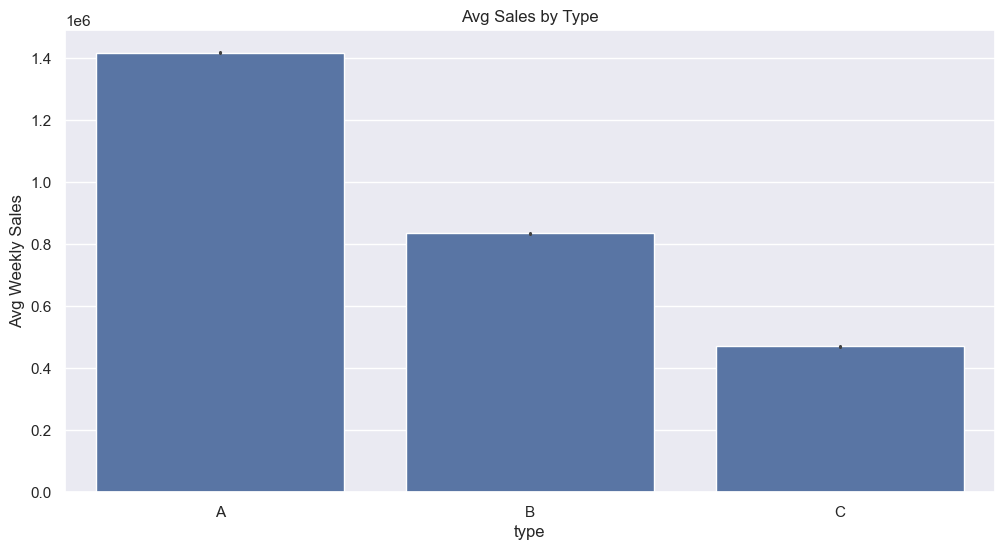

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['type'], y=df['weekly_sales'])
plt.title('Avg Sales by Type')
plt.xlabel('type')
plt.ylabel('Avg Weekly Sales')
plt.show()

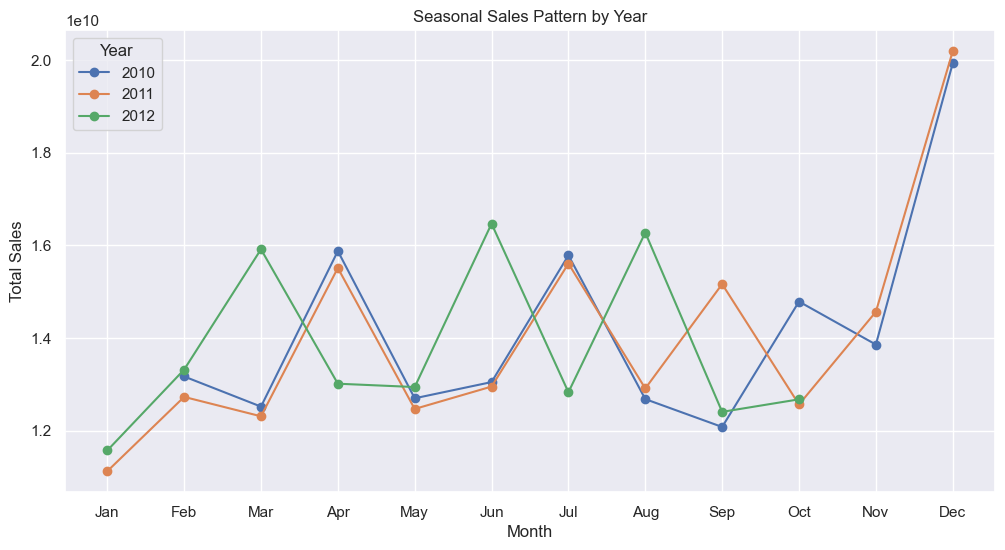

In [29]:
# Extract month names for plotting
monthly_trend['month_name'] = monthly_trend['date'].dt.strftime('%b')

# Pivot table so months are rows, years are columns
seasonal_df = monthly_trend.pivot(index='month_name', columns='year', values='weekly_sales')

# Order months correctly
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_df = seasonal_df.reindex(month_order)

# Plot
plt.figure(figsize=(12,6))
for year in seasonal_df.columns:
    plt.plot(seasonal_df.index, seasonal_df[year], marker='o', label=str(year))

plt.title('Seasonal Sales Pattern by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()
